# 1) Title, Name and References

# Title: Project 1 Linear Regression Bonus File
# Name : Rajat Kadian
# Student ID: 300351928

# 2) Library import and data preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, Lasso

In [2]:
df = pd.read_csv("dataset/Lab02_prepared.csv")

In [3]:
df.head(5)
df.shape

(1883, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1883 entries, 0 to 1882
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1883 non-null   int64  
 1   InstRating                1883 non-null   float64
 2   Lectures                  1883 non-null   float64
 3   Duration                  1883 non-null   float64
 4   AvgRating                 1883 non-null   float64
 5   LastUpdated               1883 non-null   float64
 6   Fee                       1883 non-null   float64
 7   Discount                  1883 non-null   float64
 8   cbrt_NumberRating         1883 non-null   float64
 9   cbrt_Enrollment           1883 non-null   float64
 10  cbrt_Student              1883 non-null   float64
 11  cbrt_Review               1883 non-null   float64
 12  cat_design                1883 non-null   int64  
 13  cat_it_software           1883 non-null   int64  
 14  cat_life

In [5]:
df.shape

(1883, 18)

In [6]:
df.dtypes

Unnamed: 0                    int64
InstRating                  float64
Lectures                    float64
Duration                    float64
AvgRating                   float64
LastUpdated                 float64
Fee                         float64
Discount                    float64
cbrt_NumberRating           float64
cbrt_Enrollment             float64
cbrt_Student                float64
cbrt_Review                 float64
cat_design                    int64
cat_it_software               int64
cat_lifestyle                 int64
cat_marketing                 int64
cat_personal_development      int64
cat_programming               int64
dtype: object

In [7]:
df.drop(columns=['Unnamed: 0'], inplace=True, axis=1)   ## dropping course category as we have dummy value

In [8]:
df.head(5)

,InstRating,Lectures,Duration,AvgRating,LastUpdated,Fee,Discount,cbrt_NumberRating,cbrt_Enrollment,cbrt_Student,cbrt_Review,cat_design,cat_it_software,cat_lifestyle,cat_marketing,cat_personal_development,cat_programming
0,4.5,286.0,9.800000,4.6,3.0,19.99,88.0,27.951020,48.974581,74.041978,44.791629,0,0,0,0,0,0
1,4.2,66.0,4.966667,4.2,3.0,16.99,88.0,11.416535,20.853094,31.853168,17.819177,0,0,0,0,0,1
2,4.5,251.0,93.150000,4.4,5.0,17.99,89.0,19.004616,31.409753,72.232850,36.717597,0,1,0,0,0,0
3,4.7,26.0,2.050000,4.7,3.0,16.99,80.0,16.913051,25.146869,35.740678,24.546490,0,1,0,0,0,0
4,4.4,82.0,11.066667,4.4,6.0,16.99,83.0,8.946181,17.940130,41.425278,25.027703,0,0,0,0,1,0


In [9]:
df.shape

(1883, 17)

In [10]:
df.isna().sum()

InstRating                  0
Lectures                    0
Duration                    0
AvgRating                   0
LastUpdated                 0
Fee                         0
Discount                    0
cbrt_NumberRating           0
cbrt_Enrollment             0
cbrt_Student                0
cbrt_Review                 0
cat_design                  0
cat_it_software             0
cat_lifestyle               0
cat_marketing               0
cat_personal_development    0
cat_programming             0
dtype: int64

In [11]:
df.dtypes

InstRating                  float64
Lectures                    float64
Duration                    float64
AvgRating                   float64
LastUpdated                 float64
Fee                         float64
Discount                    float64
cbrt_NumberRating           float64
cbrt_Enrollment             float64
cbrt_Student                float64
cbrt_Review                 float64
cat_design                    int64
cat_it_software               int64
cat_lifestyle                 int64
cat_marketing                 int64
cat_personal_development      int64
cat_programming               int64
dtype: object

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1883 entries, 0 to 1882
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   InstRating                1883 non-null   float64
 1   Lectures                  1883 non-null   float64
 2   Duration                  1883 non-null   float64
 3   AvgRating                 1883 non-null   float64
 4   LastUpdated               1883 non-null   float64
 5   Fee                       1883 non-null   float64
 6   Discount                  1883 non-null   float64
 7   cbrt_NumberRating         1883 non-null   float64
 8   cbrt_Enrollment           1883 non-null   float64
 9   cbrt_Student              1883 non-null   float64
 10  cbrt_Review               1883 non-null   float64
 11  cat_design                1883 non-null   int64  
 12  cat_it_software           1883 non-null   int64  
 13  cat_lifestyle             1883 non-null   int64  
 14  cat_mark

In [13]:
df.isnull().sum()

InstRating                  0
Lectures                    0
Duration                    0
AvgRating                   0
LastUpdated                 0
Fee                         0
Discount                    0
cbrt_NumberRating           0
cbrt_Enrollment             0
cbrt_Student                0
cbrt_Review                 0
cat_design                  0
cat_it_software             0
cat_lifestyle               0
cat_marketing               0
cat_personal_development    0
cat_programming             0
dtype: int64

In [14]:
df.duplicated().sum()

2

In [15]:
df.drop_duplicates(inplace=True)
df[df.duplicated()]

,InstRating,Lectures,Duration,AvgRating,LastUpdated,Fee,Discount,cbrt_NumberRating,cbrt_Enrollment,cbrt_Student,cbrt_Review,cat_design,cat_it_software,cat_lifestyle,cat_marketing,cat_personal_development,cat_programming


In [16]:
df.duplicated().sum()

0

# 3) Exploratory Data Analysis

## a) print sumamry statistics

In [17]:
df.describe()

,InstRating,Lectures,Duration,AvgRating,LastUpdated,Fee,Discount,cbrt_NumberRating,cbrt_Enrollment,cbrt_Student,cbrt_Review,cat_design,cat_it_software,cat_lifestyle,cat_marketing,cat_personal_development,cat_programming
count,1881.000000,1881.000000,1881.000000,1881.000000,1881.000000,1881.000000,1881.000000,1881.000000,1881.000000,1881.000000,1881.000000,1881.000000,1881.000000,1881.000000,1881.000000,1881.000000,1881.000000
mean,4.430835,105.194046,12.155192,4.423658,3.757044,23.196155,78.558214,12.612513,22.858254,46.189986,26.565833,0.075492,0.232323,0.072302,0.036683,0.103668,0.294524
std,0.187894,99.748711,13.457696,0.235355,1.293595,20.082883,16.461720,5.882677,10.069252,26.378770,16.777412,0.264253,0.422426,0.259056,0.188031,0.304911,0.455950
min,3.800000,5.000000,1.000000,2.700000,3.000000,15.712500,30.000000,2.571282,3.301927,3.802952,3.141381,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.300000,44.000000,4.416667,4.300000,3.000000,16.990000,74.000000,8.549880,15.654031,25.544840,13.873001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.500000,74.000000,7.883333,4.500000,3.000000,18.487500,86.000000,11.281967,21.072313,39.887601,22.521297,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.600000,125.000000,14.433333,4.600000,4.000000,21.990000,89.000000,15.123426,27.464306,61.453310,34.811229,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,4.800000,699.000000,164.000000,4.900000,12.000000,199.990000,92.000000,39.466029,59.825512,129.445070,86.756354,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## b) print out correlation of features

In [18]:
df.corr()

,InstRating,Lectures,Duration,AvgRating,LastUpdated,Fee,Discount,cbrt_NumberRating,cbrt_Enrollment,cbrt_Student,cbrt_Review,cat_design,cat_it_software,cat_lifestyle,cat_marketing,cat_personal_development,cat_programming
InstRating,1.000000,0.033595,-0.000338,0.751144,-0.042912,-0.030007,-0.009145,0.349837,0.340881,0.256413,0.360384,0.047367,-0.125821,0.110443,-0.032032,0.035163,0.051643
Lectures,0.033595,1.000000,0.716271,0.005659,-0.094410,0.004575,-0.024255,0.038145,0.031365,0.051955,0.050881,-0.048644,-0.014489,-0.078579,-0.028286,-0.103356,0.211168
Duration,-0.000338,0.716271,1.000000,-0.044205,-0.102420,0.001975,0.002756,0.022964,0.015291,0.030454,0.028319,0.003532,-0.031693,-0.076048,-0.027868,-0.111963,0.191812
AvgRating,0.751144,0.005659,-0.044205,1.000000,-0.012734,-0.058158,0.003372,0.317827,0.312933,0.183983,0.252127,0.050808,-0.123259,0.112390,-0.016015,0.033998,0.029214
LastUpdated,-0.042912,-0.094410,-0.102420,-0.012734,1.000000,0.030505,-0.063868,-0.007474,0.007436,-0.027152,-0.047125,-0.024119,-0.042663,0.096890,-0.000516,0.128621,-0.095056
Fee,-0.030007,0.004575,0.001975,-0.058158,0.030505,1.000000,0.040402,-0.023809,-0.021359,-0.021406,-0.025886,-0.013959,-0.019640,0.024227,-0.027499,0.038811,-0.077376
Discount,-0.009145,-0.024255,0.002756,0.003372,-0.063868,0.040402,1.000000,0.009650,0.021603,-0.026820,-0.018733,-0.010182,-0.044208,-0.005727,-0.013493,0.002135,-0.017168
cbrt_NumberRating,0.349837,0.038145,0.022964,0.317827,-0.007474,-0.023809,0.009650,1.000000,0.922000,0.497812,0.557824,-0.022765,-0.074190,-0.076858,-0.017985,0.015482,0.149018
cbrt_Enrollment,0.340881,0.031365,0.015291,0.312933,0.007436,-0.021359,0.021603,0.922000,1.000000,0.589657,0.590930,-0.009682,-0.097308,-0.048295,0.002670,0.022070,0.143875
cbrt_Student,0.256413,0.051955,0.030454,0.183983,-0.027152,-0.021406,-0.026820,0.497812,0.589657,1.000000,0.946153,-0.067652,-0.032341,-0.117769,-0.021468,-0.068882,0.238115


<Axes: >

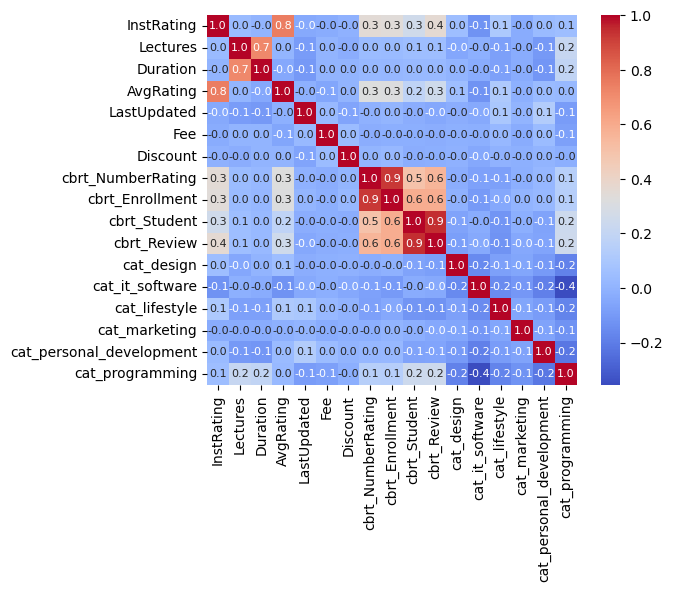

In [19]:
## Creating heatmap of correlation
sns.heatmap(df.corr(), square=True,cbar=True, annot=True, cmap='coolwarm', fmt='.1f',
            annot_kws={'size': 8},
            yticklabels=df.columns,
            xticklabels=df.columns
            )

## C) Univariate Analysis

C:\Users\Rajat\AppData\Local\Temp\ipykernel_22588\2406435533.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.InstRating)


<Axes: xlabel='InstRating', ylabel='Density'>

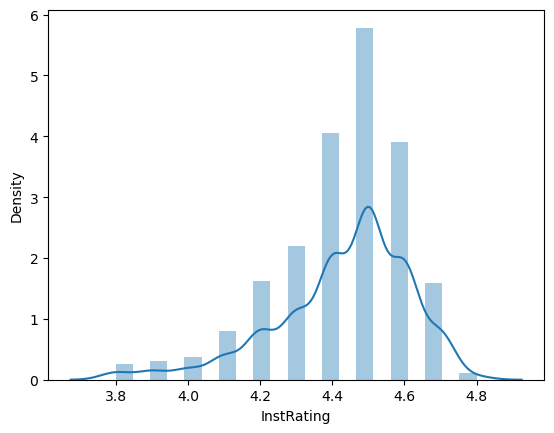

In [20]:
sns.distplot(df.InstRating)

### We can see that shape of data is right skewed not normalised

<Axes: >

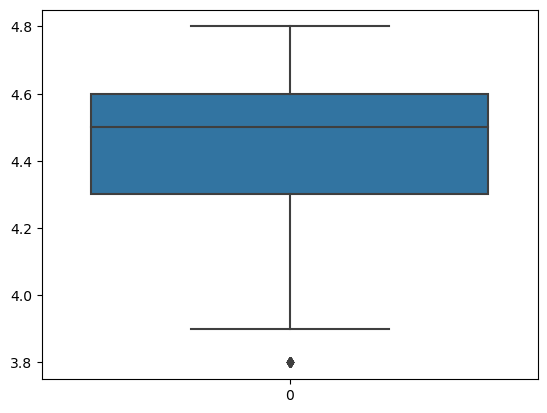

In [21]:
sns.boxplot(df.InstRating)   ## shape is right skewed

## d) Multivariate Analysis

<Axes: xlabel='InstRating', ylabel='AvgRating'>

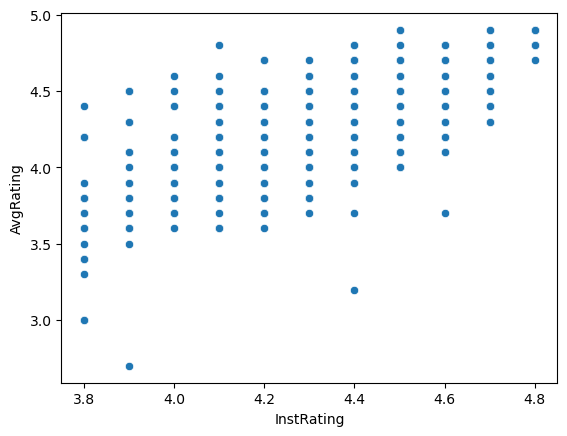

In [22]:

sns.scatterplot(x=df.InstRating, y=df.AvgRating)


# E) Feature Observation and Hypothesis
 

In [23]:
df.corr()['InstRating'].abs().sort_values(ascending=False)

InstRating                  1.000000
AvgRating                   0.751144
cbrt_Review                 0.360384
cbrt_NumberRating           0.349837
cbrt_Enrollment             0.340881
cbrt_Student                0.256413
cat_it_software             0.125821
cat_lifestyle               0.110443
cat_programming             0.051643
cat_design                  0.047367
LastUpdated                 0.042912
cat_personal_development    0.035163
Lectures                    0.033595
cat_marketing               0.032032
Fee                         0.030007
Discount                    0.009145
Duration                    0.000338
Name: InstRating, dtype: float64

# 4) Feature Selection

In [24]:
# a)
target = df.InstRating
print(df.shape)
df.reset_index(inplace=True, drop=True)

(1881, 17)


In [25]:
df

,InstRating,Lectures,Duration,AvgRating,LastUpdated,Fee,Discount,cbrt_NumberRating,cbrt_Enrollment,cbrt_Student,cbrt_Review,cat_design,cat_it_software,cat_lifestyle,cat_marketing,cat_personal_development,cat_programming
0,4.5,286.0,9.800000,4.6,3.0,19.9900,88.0,27.951020,48.974581,74.041978,44.791629,0,0,0,0,0,0
1,4.2,66.0,4.966667,4.2,3.0,16.9900,88.0,11.416535,20.853094,31.853168,17.819177,0,0,0,0,0,1
2,4.5,251.0,93.150000,4.4,5.0,17.9900,89.0,19.004616,31.409753,72.232850,36.717597,0,1,0,0,0,0
3,4.7,26.0,2.050000,4.7,3.0,16.9900,80.0,16.913051,25.146869,35.740678,24.546490,0,1,0,0,0,0
4,4.4,82.0,11.066667,4.4,6.0,16.9900,83.0,8.946181,17.940130,41.425278,25.027703,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1876,4.4,23.0,6.316667,4.6,3.0,17.9900,49.0,13.491993,24.327682,64.730800,43.108075,0,0,0,0,1,0
1877,4.6,109.0,11.733333,4.6,3.0,21.9900,92.0,12.304698,22.029575,31.038108,20.602501,0,0,0,0,0,0
1878,4.6,51.0,10.766667,4.6,5.0,28.9900,83.0,11.421648,22.999370,23.682152,11.421648,0,0,1,0,0,0
1879,4.7,56.0,8.183333,4.7,3.0,15.7125,32.0,14.857918,23.127209,60.770435,44.324902,0,0,0,0,0,1


# b) Correlation based selection

In [26]:
%run functions/Project1_RKa51928.ipynb


In [27]:
df_corr = select_correlationBonus(df)
df_corr = df_corr.drop(columns='InstRating', axis=1)
df_corr

,AvgRating,cbrt_Review,cbrt_NumberRating,cbrt_Enrollment,cbrt_Student,cat_lifestyle,cat_it_software
0,4.6,44.791629,27.951020,48.974581,74.041978,0,0
1,4.2,17.819177,11.416535,20.853094,31.853168,0,0
2,4.4,36.717597,19.004616,31.409753,72.232850,0,1
3,4.7,24.546490,16.913051,25.146869,35.740678,0,1
4,4.4,25.027703,8.946181,17.940130,41.425278,0,0
...,...,...,...,...,...,...,...
1876,4.6,43.108075,13.491993,24.327682,64.730800,0,0
1877,4.6,20.602501,12.304698,22.029575,31.038108,0,0
1878,4.6,11.421648,11.421648,22.999370,23.682152,1,0
1879,4.7,44.324902,14.857918,23.127209,60.770435,0,0


# c)Variance Threshold

In [28]:
features = df.drop('InstRating', axis=1)
df_vt = select_variance(features, 3)

In [29]:
df_vt

,Lectures,Duration,Fee,Discount,cbrt_NumberRating,cbrt_Enrollment,cbrt_Student,cbrt_Review
0,286.0,9.800000,19.9900,88.0,27.951020,48.974581,74.041978,44.791629
1,66.0,4.966667,16.9900,88.0,11.416535,20.853094,31.853168,17.819177
2,251.0,93.150000,17.9900,89.0,19.004616,31.409753,72.232850,36.717597
3,26.0,2.050000,16.9900,80.0,16.913051,25.146869,35.740678,24.546490
4,82.0,11.066667,16.9900,83.0,8.946181,17.940130,41.425278,25.027703
...,...,...,...,...,...,...,...,...
1876,23.0,6.316667,17.9900,49.0,13.491993,24.327682,64.730800,43.108075
1877,109.0,11.733333,21.9900,92.0,12.304698,22.029575,31.038108,20.602501
1878,51.0,10.766667,28.9900,83.0,11.421648,22.999370,23.682152,11.421648
1879,56.0,8.183333,15.7125,32.0,14.857918,23.127209,60.770435,44.324902


# d) Select K-Best

In [30]:
df_kbest = select_kbestBonus(df, 7)

In [31]:
df_kbest

,AvgRating,cbrt_Enrollment,cbrt_Student,cbrt_Review,cat_it_software,cat_lifestyle,cat_programming
0,4.6,48.974581,74.041978,44.791629,0,0,0
1,4.2,20.853094,31.853168,17.819177,0,0,1
2,4.4,31.409753,72.232850,36.717597,1,0,0
3,4.7,25.146869,35.740678,24.546490,1,0,0
4,4.4,17.940130,41.425278,25.027703,0,0,0
...,...,...,...,...,...,...,...
1876,4.6,24.327682,64.730800,43.108075,0,0,0
1877,4.6,22.029575,31.038108,20.602501,0,0,0
1878,4.6,22.999370,23.682152,11.421648,0,1,0
1879,4.7,23.127209,60.770435,44.324902,0,0,1


C:\Users\Rajat\AppData\Local\Temp\ipykernel_22588\1721305975.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.AvgRating)


<Axes: xlabel='AvgRating', ylabel='Density'>

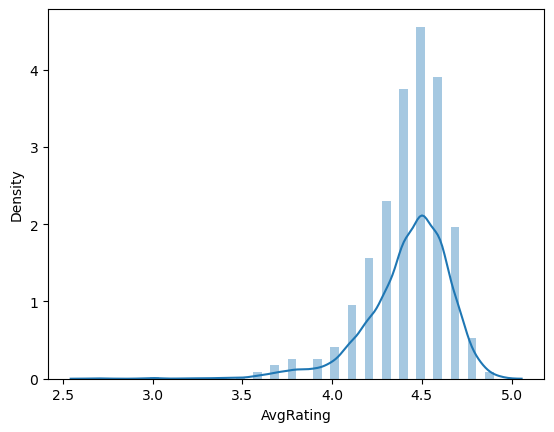

In [32]:
sns.distplot(df.AvgRating)

# 5) Linear Regression Models with Feature Selection, Feature transformation and Scaling

In [33]:
fselection = [df_corr, df_vt, df_kbest]
log_performed = ["Not Performed", "Performed"]

log_transform_result = []
fselection_list = []
ftransform_list = []
r2_list = []
rmse_list = []

for fsel in fselection:
    for lg in log_performed:
        
        if fsel.equals(df_corr):
            fselection_list.append("df_corr")
        elif fsel.equals(df_vt):
            fselection_list.append("df_vt")
        elif fsel.equals(df_kbest):
            fselection_list.append("df_kbest")
            
        if lg == "Performed": 
            fsel = make_log(fsel)   ## Performing log transformation on data 
        
        rs = RobustScaler()
        scaledFeatures = rs.fit_transform(fsel)
        fselScaled = pd.DataFrame(scaledFeatures, columns=fsel.columns)
        
        
                  
        ## performing train test splitting
        
        X_train, X_test, y_train, y_test = train_test_split(fselScaled, target, test_size=0.25, random_state=42)
        
        ## Applying Linear regression
        
        lmodel = LinearRegression()
        lmodel.fit(X_train, y_train)
        target_pred = lmodel.predict(X_test)
        
        ## Calculate performance metrics
        
        r2 = lmodel.score(X_test, y_test)
        r2_list.append(r2)  ## appending to list
        
        rmse = mean_squared_error(target_pred, y_test)** 0.5;
        rmse_list.append(round(rmse, 3))  ## appending to list
        
        
        log_transform_result.append(lg)
        
        

        

# 6. Lasso


In [34]:
alphas = np.linspace(1,0.001, 50)   ### Creating alphas value


In [35]:
rs = RobustScaler()
scaledFeatures = rs.fit_transform(features)
featureScaled = pd.DataFrame(scaledFeatures, columns=features.columns)
featureScaled

,Lectures,Duration,AvgRating,LastUpdated,Fee,Discount,cbrt_NumberRating,cbrt_Enrollment,cbrt_Student,cbrt_Review,cat_design,cat_it_software,cat_lifestyle,cat_marketing,cat_personal_development,cat_programming
0,2.617284,0.191348,0.333333,0.0,0.3005,0.133333,2.535778,2.362542,0.951151,1.063621,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.098765,-0.291181,-1.000000,0.0,-0.2995,0.133333,0.020471,-0.018562,-0.223748,-0.224571,0.0,0.0,0.0,0.0,0.0,1.0
2,2.185185,8.512479,-0.333333,2.0,-0.0995,0.200000,1.174807,0.875292,0.900769,0.678009,0.0,1.0,0.0,0.0,0.0,0.0
3,-0.592593,-0.582363,0.666667,0.0,-0.2995,-0.400000,0.856628,0.345001,-0.115486,0.096722,0.0,1.0,0.0,0.0,0.0,0.0
4,0.098765,0.317804,-0.333333,3.0,-0.2995,-0.200000,-0.355331,-0.265208,0.042822,0.119705,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1876,-0.629630,-0.156406,0.333333,0.0,-0.0995,-2.466667,0.336200,0.275639,0.691848,0.983215,0.0,0.0,0.0,0.0,1.0,0.0
1877,0.432099,0.384359,0.333333,0.0,0.7005,0.400000,0.155583,0.081053,-0.246446,-0.091641,0.0,0.0,0.0,0.0,0.0,0.0
1878,-0.283951,0.287854,0.333333,2.0,2.1005,-0.200000,0.021249,0.163168,-0.451299,-0.530114,0.0,0.0,1.0,0.0,0.0,0.0
1879,-0.222222,0.029950,0.666667,0.0,-0.5550,-3.600000,0.543991,0.173992,0.581557,1.041330,0.0,0.0,0.0,0.0,0.0,1.0


In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(featureScaled, target, random_state=42, test_size=0.25)


In [37]:
r2Lasso_List = []
rmseLasso_List = []
y_pre = []


for a in alphas:
    lasso = Lasso(alpha = a, max_iter=15000)
    lasso.fit(X_train, Y_train)
    Y_pred = lasso.predict(X_test)
    y_pre.append(Y_pred)
    
    r2Lasso_List.append(lasso.score(X_train, y_train))
    rmse = mean_squared_error(Y_test, Y_pred)**0.5;
    
    rmseLasso_List.append(rmse)
    
    
    
    
    

In [38]:
Lasso_df = pd.DataFrame(zip(alphas, rmseLasso_List, r2Lasso_List, y_pre), columns=["Alphas", "RMSE", "R2", "y_pred"])

In [39]:
LeastAlpha = Lasso_df.sort_values(by=['RMSE', 'R2'], ascending=True).head(1)
LeastAlpha

,Alphas,RMSE,R2,y_pred
49,0.001,0.126946,0.64884,"[4.501858446499126, 4.512361177729483, 4.51998..."


# 7) Plot and summary analysis

In [40]:
alp = LeastAlpha.iloc[0,0]
rmseA = LeastAlpha.iloc[0,1] 
r2A = LeastAlpha.iloc[0,2]
print(type(r2A))
fselection_list.append(f"Lasso, alpha = {alp}")
log_transform_result.append("None")
r2_list.append(round(r2A, 3))
rmse_list.append(round(rmseA, 2))

<class 'numpy.float64'>


In [41]:
ResultSummary = pd.DataFrame(zip(fselection_list, log_transform_result, r2_list, rmse_list), columns=["Feature Selection", "Log Transformation",
                                                                                            "R2 Score", "RMSE Score"])

In [42]:
ResultSummary

,Feature Selection,Log Transformation,R2 Score,RMSE Score
0,df_corr,Not Performed,0.526153,0.126
1,df_corr,Performed,0.507589,0.128
2,df_vt,Not Performed,0.243050,0.159
3,df_vt,Performed,0.286751,0.155
4,df_kbest,Not Performed,0.523738,0.126
5,df_kbest,Performed,0.502309,0.129
6,"Lasso, alpha = 0.001",None,0.649000,0.130


In [43]:
ResultSummary.sort_values(by=['R2 Score', 'RMSE Score'], ascending=False)

,Feature Selection,Log Transformation,R2 Score,RMSE Score
6,"Lasso, alpha = 0.001",None,0.649000,0.130
0,df_corr,Not Performed,0.526153,0.126
4,df_kbest,Not Performed,0.523738,0.126
1,df_corr,Performed,0.507589,0.128
5,df_kbest,Performed,0.502309,0.129
3,df_vt,Performed,0.286751,0.155
2,df_vt,Not Performed,0.243050,0.159


## According to me the best model is Lasso Alpha with score 65% .

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

In [45]:
ytest = np.array(Y_test)

In [46]:
x = LeastAlpha.y_pred
y = ytest

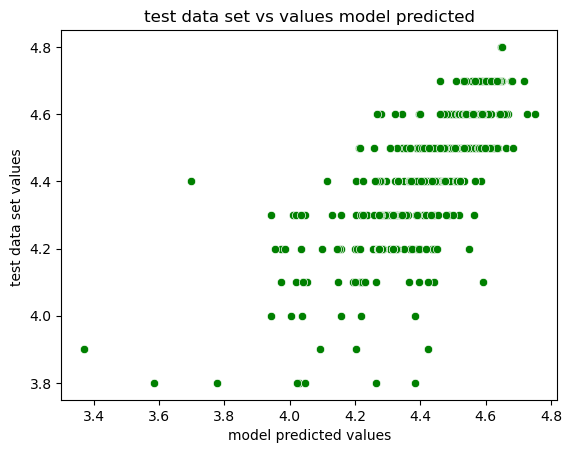

In [47]:
sns.scatterplot(x=Y_pred, y=y, color="green")
# Add title and labels
plt.title("test data set vs values model predicted")
plt.xlabel("model predicted values")
plt.ylabel("test data set values ")


plt.show()


In [48]:
### Finding the Coefficients

In [49]:
colName = list(X_train.columns)
coef = lmodel.coef_.transpose()

In [50]:
pd.DataFrame(zip(colName, coef), columns=['feature', 'coeff'])

,feature,coeff
0,Lectures,0.161821
1,Duration,0.010399
2,AvgRating,-0.152881
3,LastUpdated,0.197057
4,Fee,-0.007598
5,Discount,0.067591
6,cbrt_NumberRating,0.003841


# 8) Out of Sample Prediction

In [51]:
df.describe(percentiles=[0.25, 0.75])

,InstRating,Lectures,Duration,AvgRating,LastUpdated,Fee,Discount,cbrt_NumberRating,cbrt_Enrollment,cbrt_Student,cbrt_Review,cat_design,cat_it_software,cat_lifestyle,cat_marketing,cat_personal_development,cat_programming
count,1881.000000,1881.000000,1881.000000,1881.000000,1881.000000,1881.000000,1881.000000,1881.000000,1881.000000,1881.000000,1881.000000,1881.000000,1881.000000,1881.000000,1881.000000,1881.000000,1881.000000
mean,4.430835,105.194046,12.155192,4.423658,3.757044,23.196155,78.558214,12.612513,22.858254,46.189986,26.565833,0.075492,0.232323,0.072302,0.036683,0.103668,0.294524
std,0.187894,99.748711,13.457696,0.235355,1.293595,20.082883,16.461720,5.882677,10.069252,26.378770,16.777412,0.264253,0.422426,0.259056,0.188031,0.304911,0.455950
min,3.800000,5.000000,1.000000,2.700000,3.000000,15.712500,30.000000,2.571282,3.301927,3.802952,3.141381,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.300000,44.000000,4.416667,4.300000,3.000000,16.990000,74.000000,8.549880,15.654031,25.544840,13.873001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.500000,74.000000,7.883333,4.500000,3.000000,18.487500,86.000000,11.281967,21.072313,39.887601,22.521297,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.600000,125.000000,14.433333,4.600000,4.000000,21.990000,89.000000,15.123426,27.464306,61.453310,34.811229,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,4.800000,699.000000,164.000000,4.900000,12.000000,199.990000,92.000000,39.466029,59.825512,129.445070,86.756354,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [52]:
featureScaled.head(2)


,Lectures,Duration,AvgRating,LastUpdated,Fee,Discount,cbrt_NumberRating,cbrt_Enrollment,cbrt_Student,cbrt_Review,cat_design,cat_it_software,cat_lifestyle,cat_marketing,cat_personal_development,cat_programming
0,2.617284,0.191348,0.333333,0.0,0.3005,0.133333,2.535778,2.362542,0.951151,1.063621,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.098765,-0.291181,-1.000000,0.0,-0.2995,0.133333,0.020471,-0.018562,-0.223748,-0.224571,0.0,0.0,0.0,0.0,0.0,1.0


In [53]:
import pandas as pd

data = {
    'Lectures': [-0.679012, -0.308642],
    'Duration': [-0.321131, -0.297837],
    'AvgRating': [-1.666667, -0.333333],
    'LastUpdated': [2.0, 0.0],
    'Fee': [-0.0995, -0.5550],
    'Discount': [-2.866667, 0.133333],
    'cbrt_NumberRating': [-0.656593, 0.360699],
    'cbrt_Enrollment': [-0.934702, 0.077441],
    'cbrt_Student': [-0.443222, -0.432961],
    'cbrt_Review': [-0.636537, -0.408112],
    'cat_design': [0.0, 1.0],
    'cat_it_software': [0.0, 0.0],
    'cat_lifestyle': [0.0, 0.0],
    'cat_marketing': [0.0, 0.0],
    'cat_personal_development': [0.0, 0.0],
    'cat_programming': [1.0, 0.0]
}

df_synthetic = pd.DataFrame(data)
df_synthetic


,Lectures,Duration,AvgRating,LastUpdated,Fee,Discount,cbrt_NumberRating,cbrt_Enrollment,cbrt_Student,cbrt_Review,cat_design,cat_it_software,cat_lifestyle,cat_marketing,cat_personal_development,cat_programming
0,-0.679012,-0.321131,-1.666667,2.0,-0.0995,-2.866667,-0.656593,-0.934702,-0.443222,-0.636537,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.308642,-0.297837,-0.333333,0.0,-0.5550,0.133333,0.360699,0.077441,-0.432961,-0.408112,1.0,0.0,0.0,0.0,0.0,0.0


In [54]:
featureScaled.shape

(1881, 16)

In [55]:
df_synthetic.shape

(2, 16)

In [56]:
lasso = Lasso(alpha = 0.001, max_iter=10000)
lasso.fit(X_train, Y_train)
Y_pred = lasso.predict(df_synthetic)

print("score is" , lasso.score(X_train, y_train))

Y_pred

score is 0.6488401361264717


array([4.12474424, 4.40095374])